# RAM saving

* load pickle
* vc vs groupby with memit and %time
* 

In [1]:
from config import *
import pandas as pd
import numpy as np


In [2]:
import ipython_memory_usage 

In [3]:
#df = pd.read_csv(DATA_CSV) # 132 sec
df = pd.read_pickle(PICKLE) # 30 sec

In [3]:
%ipython_memory_usage_start

'memory profile enabled'

In [3] used 0.0000 MiB RAM in 6.93s, peaked 0.00 MiB above current, total RAM usage 81.68 MiB


In [4]:
df = pd.read_pickle(PICKLE) # 30 sec

In [4] used 9622.7070 MiB RAM in 25.38s, peaked 1005.34 MiB above current, total RAM usage 9704.39 MiB


In [ ]:
%ipython_memory_usage_stop

In [17]:
df.head()

,tin,price,date,postcode,pt,new,duration,paon,saon,street,locality,town,district,county,ppd_cat,status,year
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A,1995
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A,1995
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A,1995
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A,1995
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A,1995


In [17] used 0.0820 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 9928.10 MiB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25467513 entries, 0 to 25467512
Data columns (total 16 columns):
 #   Column    Dtype         
---  ------    -----         
 0   tin       object        
 1   price     int64         
 2   date      datetime64[ns]
 3   postcode  object        
 4   pt        object        
 5   new       object        
 6   duration  object        
 7   paon      object        
 8   saon      object        
 9   street    object        
 10  locality  object        
 11  town      object        
 12  district  object        
 13  county    object        
 14  ppd_cat   object        
 15  status    object        
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 3.0+ GB
In [5] used 1.1484 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 9705.54 MiB


In [7]:
df['year'] = df.date.dt.year

In [7] used 194.5352 MiB RAM in 2.96s, peaked 159.52 MiB above current, total RAM usage 9901.70 MiB


In [10]:
%load_ext memory_profiler

In [10] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 9925.94 MiB


In [16]:
%memit df.groupby(['year', 'pt', 'new']).size() 

peak memory: 11096.02 MiB, increment: 1168.01 MiB
In [16] used 0.0078 MiB RAM in 4.99s, peaked 1145.63 MiB above current, total RAM usage 9928.02 MiB


In [15]:
result = df.groupby(['year', 'pt', 'new']).size() 

In [15] used 0.0000 MiB RAM in 4.52s, peaked 1167.79 MiB above current, total RAM usage 9928.01 MiB


# Test resample

In [46]:
dfs = df.query('date >= "2018-01-01" and date < "2019-12-29"').copy().set_index('date')

In [46] used 187.1523 MiB RAM in 1.50s, peaked 264.70 MiB above current, total RAM usage 11787.43 MiB


In [47]:
result = dfs.resample('W')['pt'].count()
result

date
2018-01-07    10747
2018-01-14    14495
2018-01-21    16223
2018-01-28    18376
2018-02-04    20051
              ...  
2019-12-01    26530
2019-12-08    20718
2019-12-15    23859
2019-12-22    36078
2019-12-29     1463
Freq: W-SUN, Name: pt, Length: 104, dtype: int64

In [47] used 15.5195 MiB RAM in 3.93s, peaked 276.99 MiB above current, total RAM usage 11802.95 MiB


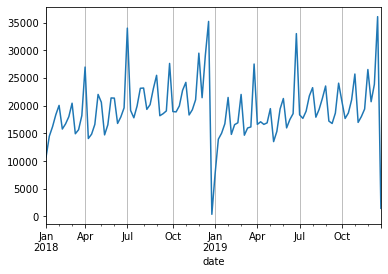

In [48] used 0.3359 MiB RAM in 0.33s, peaked 0.00 MiB above current, total RAM usage 11803.29 MiB


In [48]:
ax = result.plot()
ax.grid(axis='x')

In [50]:
%%time
df.paon.str.lower().str.contains('cottage').sum()

CPU times: user 17.3 s, sys: 1.16 s, total: 18.5 s
Wall time: 18.5 s


321828

In [50] used 1793.3789 MiB RAM in 18.57s, peaked 388.56 MiB above current, total RAM usage 15393.04 MiB


In [ ]:
1/0

In [5]:
df.head()

,tin,price,date,postcode,pt,new,duration,paon,saon,street,locality,town,district,county,ppd_cat,status
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A


In [6]:
df.price.describe()

count    2.546751e+07
mean     1.991012e+05
std      7.602183e+05
min      1.000000e+00
25%      7.999500e+04
50%      1.400000e+05
75%      2.300000e+05
max      5.943000e+08
Name: price, dtype: float64

# value counts & groupby same speed but different resource usage

In [8]:
%time df.pt.value_counts(dropna=False)

CPU times: user 1.97 s, sys: 15.1 ms, total: 1.99 s
Wall time: 1.98 s


T    7709663
S    6997352
D    5857769
F    4603196
O     299533
Name: pt, dtype: int64

In [7]:
%time df.pt.value_counts()

CPU times: user 1.95 s, sys: 8.87 ms, total: 1.96 s
Wall time: 1.94 s


T    7709663
S    6997352
D    5857769
F    4603196
O     299533
Name: pt, dtype: int64

In [9]:
%time df.groupby('pt').size().sort_values(ascending=False)

CPU times: user 1.71 s, sys: 285 ms, total: 1.99 s
Wall time: 1.98 s


pt
T    7709663
S    6997352
D    5857769
F    4603196
O     299533
dtype: int64

In [10]:
%load_ext memory_profiler
%memit df.pt.value_counts()

peak memory: 9777.30 MiB, increment: 23.12 MiB


In [11]:
%memit df.groupby('pt').size().sort_values(ascending=False)

peak memory: 10141.95 MiB, increment: 412.92 MiB


In [12]:
%time df[['pt']].groupby('pt').size().sort_values(ascending=False)

CPU times: user 1.96 s, sys: 390 ms, total: 2.35 s
Wall time: 2.35 s


pt
T    7709663
S    6997352
D    5857769
F    4603196
O     299533
dtype: int64

In [13]:
%memit df[['pt']].groupby('pt').size().sort_values(ascending=False)

peak memory: 10320.46 MiB, increment: 567.00 MiB


In [14]:
%time df.groupby('pt').price.mean()

CPU times: user 1.8 s, sys: 305 ms, total: 2.1 s
Wall time: 2.1 s


pt
D    2.687413e+05
F    1.896446e+05
O    1.213034e+06
S    1.608487e+05
T    1.471605e+05
Name: price, dtype: float64

In [15]:
%memit df.groupby('pt').price.mean()

peak memory: 10142.04 MiB, increment: 388.52 MiB


## What about county?

In [16]:
%time df.groupby(['county', 'pt'])['price'].mean()

CPU times: user 4.34 s, sys: 718 ms, total: 5.06 s
Wall time: 5.08 s


county                        pt
AVON                          D     1.015364e+05
                              F     4.877750e+04
                              S     6.104489e+04
                              T     5.064950e+04
BATH AND NORTH EAST SOMERSET  D     3.566669e+05
                                        ...     
YORK                          D     2.393627e+05
                              F     1.473420e+05
                              O     1.012943e+06
                              S     1.555586e+05
                              T     1.542359e+05
Name: price, Length: 625, dtype: float64

In [17]:
%memit df.groupby(['county', 'pt'])['price'].mean()

peak memory: 10727.59 MiB, increment: 971.34 MiB


# What if we change dtypes?

In [142]:
df_few_cols = df[['county', 'pt', 'date', 'price']]
df_few_cols.head()

,county,pt,date,price
0,TORBAY,F,1995-01-31,18500
1,MERSEYSIDE,D,1995-10-09,73450
2,POOLE,D,1995-03-31,59000
3,SUFFOLK,D,1995-12-04,31000
4,STAFFORDSHIRE,D,1995-09-22,95000


In [143]:
df_few_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25467513 entries, 0 to 25467512
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 777.2+ MB


In [145]:
df_few_cols.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25467513 entries, 0 to 25467512
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.4 GB


In [18]:
#df_few_cols = df[['county', 'pt', 'date', 'price']]
print(f"New dataframe has shape {df_few_cols.shape}")
# string columns are mis-represented with deep=True)
df_few_cols.memory_usage(index=False)

New dataframe has shape (25467513, 4)


county    203740104
pt        203740104
date      203740104
price     203740104
dtype: int64

In [19]:
25467513 * 8 == 203740104 # 8 bytes

True

In [20]:
df_few_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25467513 entries, 0 to 25467512
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 777.2+ MB


In [21]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]') # 8byte datetime
df_few_cols.pt.dtype, df_few_cols.date.dtype, df_few_cols.price.dtype, 

(dtype('O'), dtype('<M8[ns]'), dtype('int64'))

In [22]:
df_slimmer_cols = pd.DataFrame({'county_cat': df_few_cols.county.astype('category'),
                                'pt_cat': df_few_cols.pt.astype('category'),
                                'date_cat': df_few_cols.date.astype('category'),
                                'price_i32': df_few_cols.price.astype('int32')})

In [23]:
# ask for deep=True to get the true string cost
df_slimmer_cols.memory_usage(deep=True, index=False)

county_cat     50948987
pt_cat         25467963
date_cat       51337602
price_i32     101870052
dtype: int64

In [24]:
df_slimmer_cols.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25467513 entries, 0 to 25467512
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   county_cat  category
 1   pt_cat      category
 2   date_cat    category
 3   price_i32   int32   
dtypes: category(3), int32(1)
memory usage: 219.0 MB


In [25]:
assert (df_slimmer_cols.date_cat == df_few_cols.date).all()
assert (df_slimmer_cols.county_cat == df_few_cols.county).all()
assert (df_slimmer_cols.pt_cat == df_few_cols.pt).all()
assert (df_slimmer_cols.price_i32 == df_few_cols.price).all()

df_slimmer_cols.memory_usage(index=False)

county_cat     50941170
pt_cat         25467713
date_cat       51337602
price_i32     101870052
dtype: int64

In [147]:
%time df_few_cols.pt.value_counts()

CPU times: user 1.97 s, sys: 1.67 ms, total: 1.97 s
Wall time: 1.96 s


T    7709663
S    6997352
D    5857769
F    4603196
O     299533
Name: pt, dtype: int64

In [148]:
%time df_slimmer_cols.pt_cat.value_counts()

CPU times: user 110 ms, sys: 35.7 ms, total: 146 ms
Wall time: 146 ms


T    7709663
S    6997352
D    5857769
F    4603196
O     299533
Name: pt_cat, dtype: int64

In [150]:
%time df_few_cols.groupby('pt').size().sort_values(ascending=False)

CPU times: user 1.58 s, sys: 287 ms, total: 1.87 s
Wall time: 1.86 s


pt
T    7709663
S    6997352
D    5857769
F    4603196
O     299533
dtype: int64

In [27]:
%time df_slimmer_cols.groupby('pt_cat').size().sort_values(ascending=False)

CPU times: user 322 ms, sys: 140 ms, total: 462 ms
Wall time: 465 ms


pt_cat
T    7709663
S    6997352
D    5857769
F    4603196
O     299533
dtype: int64

This doesn't seem to change the memory used during these operations!

In [28]:
%memit df_slimmer_cols.pt_cat.value_counts()

peak memory: 10944.66 MiB, increment: 194.31 MiB


In [29]:
%memit df_slimmer_cols.groupby('pt_cat').size().sort_values(ascending=False)

peak memory: 11138.96 MiB, increment: 388.61 MiB


In [30]:
%time df_slimmer_cols.groupby('pt_cat').price_i32.mean()

CPU times: user 300 ms, sys: 77 ms, total: 377 ms
Wall time: 375 ms


pt_cat
D    2.687413e+05
F    1.896446e+05
O    1.213034e+06
S    1.608487e+05
T    1.471605e+05
Name: price_i32, dtype: float64

In [31]:
%memit df_slimmer_cols.groupby('pt_cat').price_i32.mean()

peak memory: 11139.04 MiB, increment: 388.61 MiB


In [32]:
# again faster but no RAM saving
%timeit df_slimmer_cols.groupby(['county_cat', 'pt_cat'])['price_i32'].mean()

880 ms ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%memit df_slimmer_cols.groupby(['county_cat', 'pt_cat'])['price_i32'].mean()

peak memory: 11612.52 MiB, increment: 859.33 MiB


<AxesSubplot:>

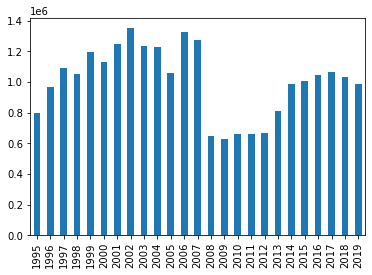

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
res = df_slimmer_cols.query("date_cat.dt.year<2020").date_cat.dt.year.value_counts().sort_index()
res.plot(kind="bar", ax=ax)

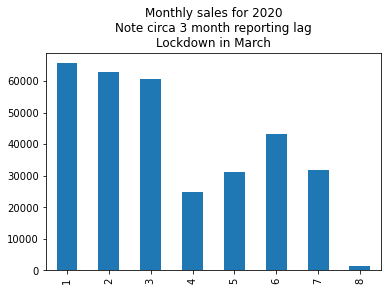

In [35]:
fig, ax = plt.subplots()
res = df_slimmer_cols.query("date_cat.dt.year==2020").date_cat.dt.month.value_counts().sort_index()
res.plot(kind="bar", ax=ax)
ax.set(title='Monthly sales for 2020\nNote circa 3 month reporting lag\nLockdown in March');

# Str speed

Making a new "length of string" column on 25M rows costs circa 11s

In [36]:
%time df['street_nchars'] = df.street.str.len()

CPU times: user 11.9 s, sys: 895 ms, total: 12.8 s
Wall time: 12.7 s


<AxesSubplot:xlabel='street_nchars'>

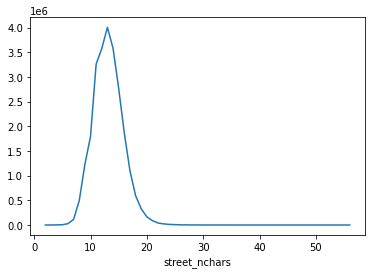

In [43]:
res_street_nchars_size = df.groupby('street_nchars')['price'].size()
res_street_nchars_size.plot()

In [62]:
%time res1 = df.query('street_nchars > 4 and street_nchars < 26') # 5s
%time res2 = res1.groupby('street_nchars')['price'] # 1s
%time res3 = res2.median() # 1s

del res1
del res2

CPU times: user 3.93 s, sys: 1.21 s, total: 5.14 s
Wall time: 4.97 s
CPU times: user 667 µs, sys: 164 µs, total: 831 µs
Wall time: 772 µs
CPU times: user 1.03 s, sys: 176 ms, total: 1.21 s
Wall time: 1.21 s


In [ ]:
if False:
    %time mask = df['street_nchars'] < 25 # 18ms
    #%time df_masked = df[mask] 13s & copies!
    #%time df_masked.groupby('street_nchars')['price'] 10ms
    %time df[mask].groupby('street_nchars')['price']

In [81]:
#mask = res_street_nchars_size > 5000
#res_street_nchars_size

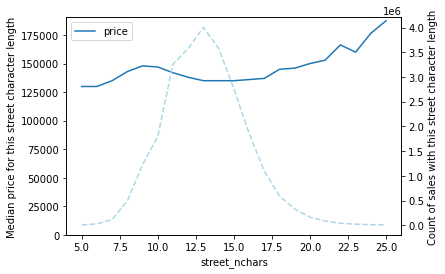

In [80]:
fig, ax = plt.subplots()
ax_right = ax.twinx()
res3.plot(ax=ax)
#ax.set(ymin=0)
ax.set_ylim(ymin=0)
res_street_nchars_size[res3.index].plot(ax=ax_right, linestyle='--', color='lightblue')
ax_right.set_ylabel('Count of sales with this street character length')
ax.set_ylabel('Median price for this street character length')
ax.legend()

## groupby pt year

In [85]:
df['year'] = df.date.dt.year

In [194]:
gpby = df.groupby(['year', 'pt'])
nbr_sales_per_year = gpby.size()
# (T)erraced, (S)emi, (D)etached, (F)lat/appartment, (O)ther

In [195]:
# sort by approx display order
sorted_index = nbr_sales_per_year.unstack().mean().sort_values(ascending=False).index
nbr_sales_per_year = nbr_sales_per_year.unstack().T.loc[sorted_index].T
nbr_sales_per_year.index.name="Year"

In [196]:
nbr_sales_per_year = nbr_sales_per_year.rename(columns={'T': 'Terraced', 'S': 'Semi', 'D': 'Detached', 'F': 'Flat', 'O': 'Other'})

In [ ]:
fig, ax = plt.subplots()
nbr_sales_per_year.plot(ax=ax)
ax.set_title("House types total sales by year\nNote the 'Great Recession'")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y') # horizontal grid lines only
import matplotlib as mpl
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Number of sales");
ax.axvline(2007, color='grey', linestyle='--')
#ax.legend(frameon=False)

In [99]:
%time df.groupby(['year', 'pt'])

CPU times: user 558 µs, sys: 0 ns, total: 558 µs
Wall time: 572 µs


In [91]:
%memit df.groupby(['year', 'pt'])

peak memory: 12144.44 MiB, increment: 0.17 MiB


In [100]:
%memit gpby.size()

peak memory: 12338.70 MiB, increment: 194.23 MiB


In [102]:
%time gpby.size();

CPU times: user 182 ms, sys: 47.7 ms, total: 230 ms
Wall time: 228 ms


year  pt
1995  D     191887
      F     110841
      O          7
      S     242913
      T     250996
             ...  
2020  D      69845
      F      49990
      O      17057
      S      89370
      T      94824
Length: 130, dtype: int64

In [103]:
%memit df.groupby(['year']).size()

peak memory: 12533.13 MiB, increment: 388.66 MiB


In [104]:
%memit df.groupby(['year', 'pt']).size()

peak memory: 13073.68 MiB, increment: 929.11 MiB


In [209]:
%memit df.groupby(['year', 'pt', 'new']).size() 

peak memory: 14064.73 MiB, increment: 1160.05 MiB


In [141]:
df.groupby(['year']).size().shape

(26,)

In [112]:
df.groupby(['year', 'pt', 'new']).size().shape

(247,)

In [204]:
df_slimmer_cols['year_cat'] = df_slimmer_cols.date_cat.dt.year.astype('category')
df_slimmer_cols['new_cat'] = df['new'].astype('category')

In [210]:
%memit df_slimmer_cols.groupby(['year_cat', 'pt_cat', 'new_cat']).size() 

peak memory: 13739.89 MiB, increment: 835.22 MiB


# Paon

In [137]:
def c(item):
    try:
        # could be "Severn Court" or "22" or missing
        return int(item)
    except ValueError:
        return np.NaN
    
%time df['paon_nbr'] = df['paon'].apply(c).astype('Int64')

CPU times: user 18.4 s, sys: 765 ms, total: 19.2 s
Wall time: 19.2 s


In [140]:
df['paon_nbr'].value_counts(dropna=False)[:3]

NaN    4496642
1       633683
2       633457
Name: paon_nbr, dtype: Int64

<AxesSubplot:>

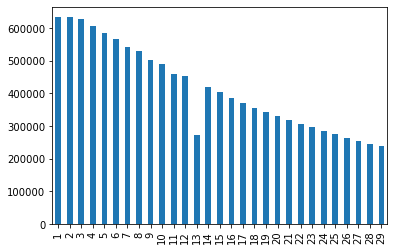

In [138]:
df['paon_nbr'].value_counts(dropna=False).sort_index()[1:30].plot(kind='bar')

# Math speed

In [ ]:
# no useful speedup on int
pd.options.compute.use_bottleneck=False
pd.options.compute.use_numexpr=False
%timeit df.price.mean()

In [211]:
pd.options.compute.use_bottleneck=True
%timeit df.price.mean()

49.2 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [212]:
%timeit df.price.to_numpy().mean()

34.3 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [213]:
%timeit np.nanmean(df.price.to_numpy())

34.7 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [216]:
df['price_f64'] = df.price.astype('float64')
assert (df.price == df.price_f64).all()
assert (df.price_f64.isnull() == False).all()

In [217]:
# affects float, much less for int
pd.options.compute.use_bottleneck=False
%timeit df.price_f64.mean()

137 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [218]:
%timeit np.nanmean(df.price_f64.to_numpy())

148 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [219]:
assert np.isnan(np.mean(   np.array([np.nan, 1, 2, 3])))
assert   2.0 == np.nanmean(np.array([np.nan, 1, 2, 3]))

In [220]:
pd.options.compute.use_bottleneck=True
%timeit df.price_f64.mean()

55.3 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [221]:
%timeit df.price_f64.to_numpy().mean()

16.8 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## numexpr test

NOTE not clear that adding numexpr helps, but it isn't clear if it is being used or if it is even the bottleneck!

In [ ]:
df['year'] = df.date.dt.year

In [ ]:
#qry = "pt == 'D' and price > 50_000 and price < 500_000"
#qry = "pt == 'T' and price > 50_000"
#(12935989, 19)
#qry = "year > 2000 and year < 2015 and price > 50_000 and price < 1_000_000 and street_nchars != 5" # 
#(12938903, 19)
#qry = "year > 2000 and year < 2015 and price > 50_000 and price < 1_000_000"
qry = "year > 2000 & year < 2015 & ((price*price) > 50_000)"

print(df.query(qry).shape)
pd.options.compute.use_numexpr=False
%time df.query(qry).shape
pd.options.compute.use_numexpr=True
%time df.query(qry).shape

In [ ]:
pd.options.compute.use_numexpr=False
%timeit df.query(qry).shape

In [ ]:
pd.options.compute.use_numexpr=True
%timeit df.query(qry).shape

In [ ]:
df.head()

# Extract "is_cottage", groupby mean

# TEMP

In [ ]:
dfx = pd.DataFrame({'a': [np.nan, 1, 2, 2, 3], 'b': [1, 1, 1, 1, 1]})
dfx.groupby('a', dropna=False).size()

In [ ]:
dfx.a.value_counts(dropna=False)